In [1]:
import pandas as pd
data= pd.read_csv("/content/train.csv")
data.head()

,Unnamed: 0,Text,Label
0,0,What is the resolution of the primary camera o...,2
1,1,Does this phone have a dual-camera setup?,2
2,2,Is there a dedicated night mode feature on the...,2
3,3,What is the zoom capability of the camera on t...,2
4,4,Does the camera on this phone have optical or ...,2


In [2]:
df=data.drop(data.columns[0],axis=1)
df.head()

,Text,Label
0,What is the resolution of the primary camera o...,2
1,Does this phone have a dual-camera setup?,2
2,Is there a dedicated night mode feature on the...,2
3,What is the zoom capability of the camera on t...,2
4,Does the camera on this phone have optical or ...,2


<AxesSubplot:>

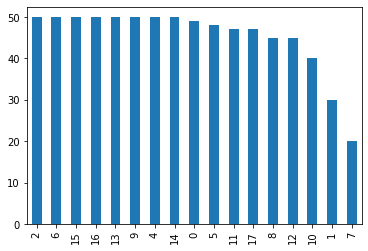

In [3]:
import matplotlib.pyplot as plt
df['Label'].value_counts().plot(kind='bar')

In [4]:
df.isna().sum()

Text     0
Label    0
dtype: int64

In [5]:
df.shape

(771, 2)

In [6]:
#Importing necessary libraries
import string
import re
import nltk
nltk.download('all')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

In [7]:
text=list(df['Text'])

lemmatizer= WordNetLemmatizer()
corpus=[]

for i in range(len(text)):
  r= re.sub('[^a-zA-Z]',' ',text[i])
  r= r.lower()
  r= r.split()
  r= [word for word in r if word not in stopwords.words('english')]
  r= [lemmatizer.lemmatize(word) for word in r]
  r= ' '.join(r)
  corpus.append(r)


In [8]:
df['Text']=corpus
df.head()

,Text,Label
0,resolution primary camera phone,2
1,phone dual camera setup,2
2,dedicated night mode feature camera phone,2
3,zoom capability camera phone,2
4,camera phone optical digital image stabilization,2


In [9]:
from sklearn.model_selection import StratifiedKFold, train_test_split

#Creating feature and label datasets
X= df['Text'] 
y= df['Label']

df_train,df_test= train_test_split(df,test_size=0.20,stratify=df.Label)


In [10]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer( ngram_range=(1,3),stop_words ='english')
X_train = vec.fit_transform(df_train.Text)
X_test= vec.transform(df_test.Text)

y_train = df_train.Label
y_test = df_test.Label

In [11]:
X_train.shape

(616, 3701)

In [12]:
X_test.shape

(155, 3701)

In [13]:
from sklearn.naive_bayes import MultinomialNB
nb= MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB()

In [14]:
from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, classification_report
preds= nb.predict(X_test)
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       0.50      0.50      0.50         6
           2       0.70      0.70      0.70        10
           4       1.00      1.00      1.00        10
           5       0.91      1.00      0.95        10
           6       0.91      1.00      0.95        10
           7       1.00      1.00      1.00         4
           8       1.00      1.00      1.00         9
           9       1.00      0.90      0.95        10
          10       1.00      0.50      0.67         8
          11       1.00      1.00      1.00         9
          12       0.90      1.00      0.95         9
          13       0.89      0.80      0.84        10
          14       0.82      0.90      0.86        10
          15       1.00      0.90      0.95        10
          16       0.67      1.00      0.80        10
          17       1.00      0.70      0.82        10

    accuracy              

In [15]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,preds))

[[10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  4  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  9  0  0  0  0  0  0  1  0]
 [ 1  0  0  0  1  1  0  0  0  4  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  9  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  9  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  8  2  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  9  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  9  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 10  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  3  7]]


In [16]:
print("Accuracy Score:" ,metrics.accuracy_score(y_test,preds))

Accuracy Score: 0.8838709677419355
